# Traffic Sign Classification
## Jovan Juric 1206

Cilj ovog projekta je klasifikacija saobraćajnih znakova sa slika pomoću keras i tensorflow biblioteka.

In [11]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import random

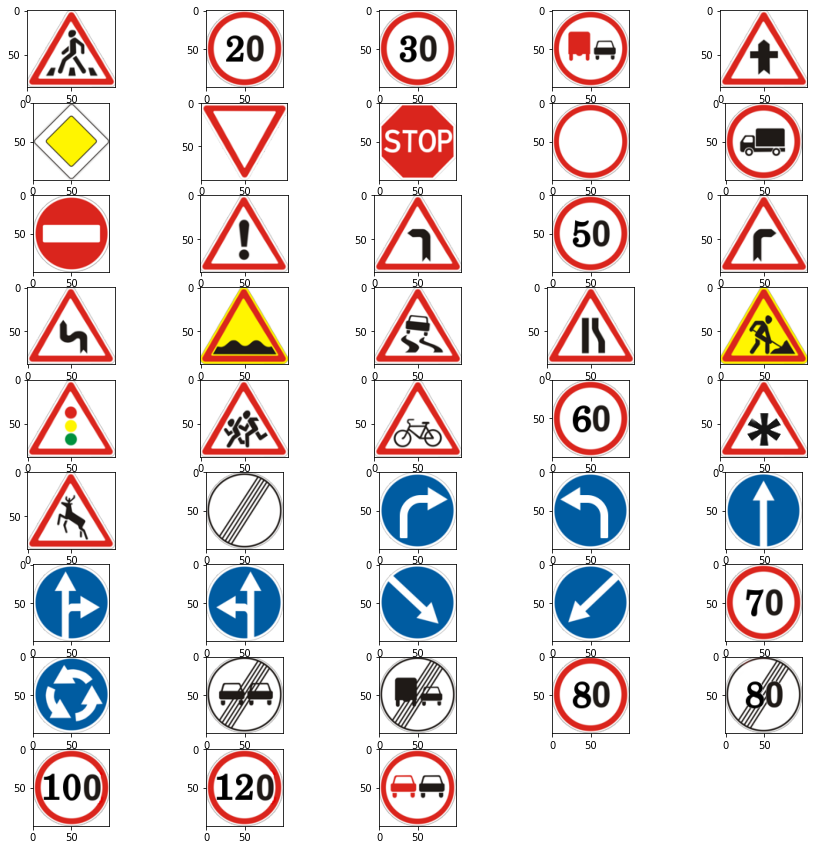

In [12]:
meta_df = pd.read_csv('./dataset/Meta.csv')
train_df = pd.read_csv('./dataset/Train.csv')
test_df = pd.read_csv('./dataset/Test.csv')

meta_img_paths = meta_df['Path'].values

plt.figure(figsize=(15,15))

for i, path in enumerate(meta_img_paths):
    plt.subplot(9,5,i+1)
    image_path = './dataset/' + path
    img = imread(image_path)
    plt.imshow(img)

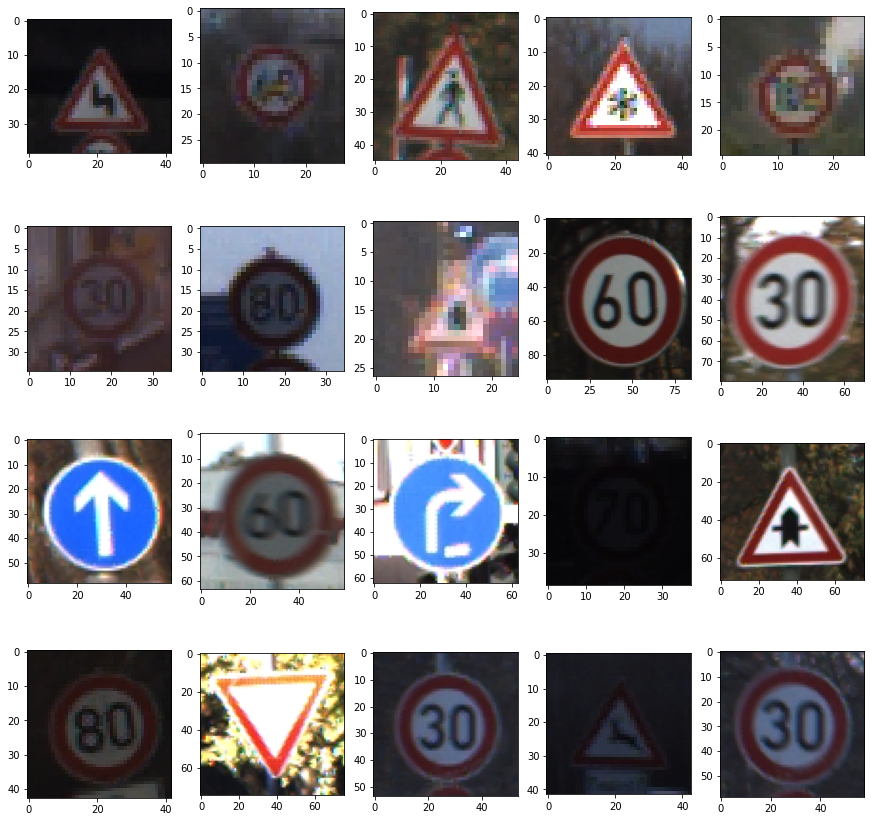

In [13]:
train_img_paths = train_df['Path'].values

plt.figure(figsize=(15,15))

for i in range(1,21):
    plt.subplot(4,5,i)
    path = random.choice(train_img_paths)
    image_path = './dataset/' + path
    img = imread(image_path)
    plt.imshow(img)

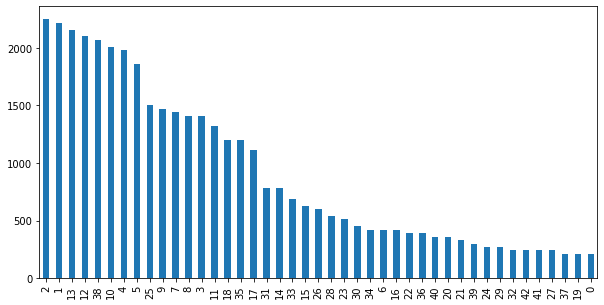

In [14]:
plt.figure(figsize=(10,5))
train_df['ClassId'].value_counts(sort=True).plot.bar()
plt.show()

In [15]:
train_df = train_df.sample(frac=1)

labels = np.array(train_df['ClassId'])
img_paths = list(train_df['Path'])

data = list()

import cv2

for path in img_paths:
    image = cv2.imread('dataset/'+path)
    image = cv2.resize(image,(32,32))
    data.append(np.array(image))    

In [17]:
img_data = np.array(data)
print(img_data.shape)
img_data = img_data/256
img_data

(39209, 32, 32, 3)


array([[[[0.29296875, 0.30859375, 0.3125    ],
         [0.3046875 , 0.3203125 , 0.328125  ],
         [0.30859375, 0.328125  , 0.33203125],
         ...,
         [0.4375    , 0.44921875, 0.4375    ],
         [0.4296875 , 0.44140625, 0.42578125],
         [0.4375    , 0.4453125 , 0.43359375]],

        [[0.2890625 , 0.30078125, 0.29296875],
         [0.29296875, 0.30078125, 0.29296875],
         [0.2890625 , 0.3125    , 0.3125    ],
         ...,
         [0.40234375, 0.41796875, 0.4140625 ],
         [0.40625   , 0.41015625, 0.40625   ],
         [0.4140625 , 0.41796875, 0.40625   ]],

        [[0.28515625, 0.30078125, 0.27734375],
         [0.27734375, 0.2890625 , 0.2734375 ],
         [0.265625  , 0.296875  , 0.296875  ],
         ...,
         [0.375     , 0.37890625, 0.37109375],
         [0.34375   , 0.33203125, 0.33203125],
         [0.35546875, 0.33984375, 0.33203125]],

        ...,

        [[0.25390625, 0.26953125, 0.25      ],
         [0.234375  , 0.25      , 0.23828125]

In [18]:
labels = keras.utils.to_categorical(labels,43)
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(img_data,labels, train_size=0.8, random_state=7)

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(31367, 32, 32, 3)
(7842, 32, 32, 3)
(31367, 43)
(7842, 43)


In [33]:
# Building the model
inputs = tf.keras.layers.Input((32,32,3))

conv1 = keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same', strides=(1,1))(inputs)
drop1 = keras.layers.Dropout(0.1)(conv1)
conv2 = keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same', strides=(1,1))(drop1)
pool1 = keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(conv2)

conv3 = keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same', strides=(1,1))(pool1)
drop2 = keras.layers.Dropout(0.1)(conv3)
conv4 = keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same', strides=(1,1))(drop2)
pool2 = keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(conv4)

conv5 = keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same', strides=(1,1))(pool2)
drop3 = keras.layers.Dropout(0.1)(conv5)
conv6 = keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same', strides=(1,1))(drop3)
pool3 = keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(conv6)

conv7 = keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same', strides=(1,1))(pool3)
drop4 = keras.layers.Dropout(0.1)(conv7)
conv8 = keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same', strides=(1,1))(drop4)
pool4 = keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(conv8)

flat = keras.layers.Flatten()(pool4)

dense1 = keras.layers.Dense(512,activation='relu')(flat)
drop5 = keras.layers.Dropout(0.4)(dense1)

outputs = keras.layers.Dense(43, activation='softmax')(drop5)

model = keras.Model(inputs=[inputs], outputs=[outputs])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_20 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_21 (Dropout)         (None, 16, 16, 64)       

In [34]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('traffic_sign_detection_model.h5', verbose=1, save_best_only=True)
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs'),
    checkpointer]

results = model.fit(img_data, labels, batch_size=16, validation_split=0.2, epochs=20, callbacks=callbacks)


Epoch 1/20
1961/1961 [==============================] - ETA: 0s - loss: 1.9691 - accuracy: 0.4308
Epoch 00001: val_loss improved from inf to 0.47467, saving model to traffic_sign_detection_model.h5
1961/1961 [==============================] - 28s 14ms/step - loss: 1.9691 - accuracy: 0.4308 - val_loss: 0.4747 - val_accuracy: 0.8434
Epoch 2/20
1959/1961 [============================>.] - ETA: 0s - loss: 0.3063 - accuracy: 0.9065
Epoch 00002: val_loss improved from 0.47467 to 0.10140, saving model to traffic_sign_detection_model.h5
1961/1961 [==============================] - 28s 14ms/step - loss: 0.3061 - accuracy: 0.9066 - val_loss: 0.1014 - val_accuracy: 0.9736
Epoch 3/20
1958/1961 [============================>.] - ETA: 0s - loss: 0.1784 - accuracy: 0.9508
Epoch 00003: val_loss did not improve from 0.10140
1961/1961 [==============================] - 28s 14ms/step - loss: 0.1785 - accuracy: 0.9508 - val_loss: 0.1326 - val_accuracy: 0.9593
Epoch 4/20
1961/1961 [========================

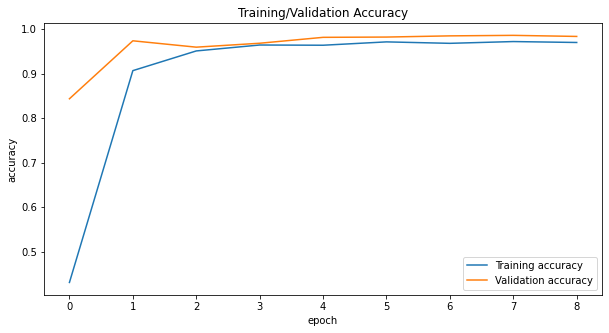

In [39]:
plt.figure(figsize=(10,5))
plt.title('Training/Validation Accuracy')
plt.plot(results.history['accuracy'], label = 'Training accuracy')
plt.plot(results.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

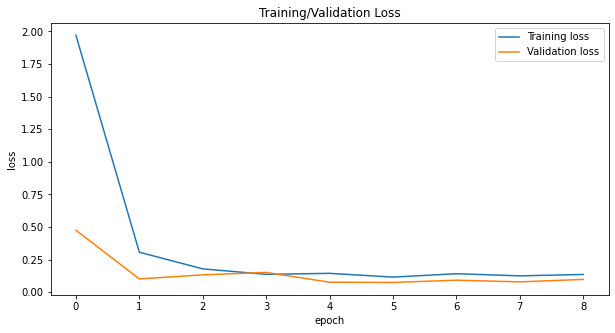

In [40]:
plt.figure(figsize=(10,5))
plt.title('Training/Validation Loss')
plt.plot(results.history['loss'], label = 'Training loss')
plt.plot(results.history['val_loss'], label = 'Validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [41]:
labels = np.array(test_df['ClassId'])
img_paths = list(test_df['Path'])

data = list()

for path in img_paths:
    image = cv2.imread('dataset/'+path)
    image = cv2.resize(image,(32,32))
    data.append(np.array(image)) 

In [42]:
img_data = np.array(data)
print(img_data.shape)
img_data = img_data/256
img_data

(12630, 32, 32, 3)


array([[[[0.6796875 , 0.54296875, 0.453125  ],
         [0.66796875, 0.53515625, 0.453125  ],
         [0.671875  , 0.5390625 , 0.4609375 ],
         ...,
         [0.55859375, 0.4453125 , 0.3828125 ],
         [0.57421875, 0.47265625, 0.37890625],
         [0.5078125 , 0.41015625, 0.33203125]],

        [[0.6875    , 0.5546875 , 0.44921875],
         [0.6796875 , 0.546875  , 0.44921875],
         [0.68359375, 0.55078125, 0.45703125],
         ...,
         [0.6875    , 0.55859375, 0.46484375],
         [0.67578125, 0.55078125, 0.46875   ],
         [0.66796875, 0.54296875, 0.46875   ]],

        [[0.6796875 , 0.55078125, 0.45703125],
         [0.68359375, 0.5546875 , 0.45703125],
         [0.671875  , 0.546875  , 0.4453125 ],
         ...,
         [0.69921875, 0.5625    , 0.46875   ],
         [0.69921875, 0.5625    , 0.4765625 ],
         [0.69140625, 0.55859375, 0.46875   ]],

        ...,

        [[0.65234375, 0.53515625, 0.45703125],
         [0.640625  , 0.5234375 , 0.44921875]

In [43]:
test_labels = keras.utils.to_categorical(labels,43)
test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [45]:
pred = model.predict(img_data, verbose=1)

395/395 [==============================] - 2s 5ms/step


In [52]:
from sklearn.metrics import accuracy_score
test_labels = np.array(test_df['ClassId'])
pred = model.predict(img_data)
pred = np.argmax(pred,axis=1)

accuracy_score(test_labels,pred)

0.9492478226444973

[]

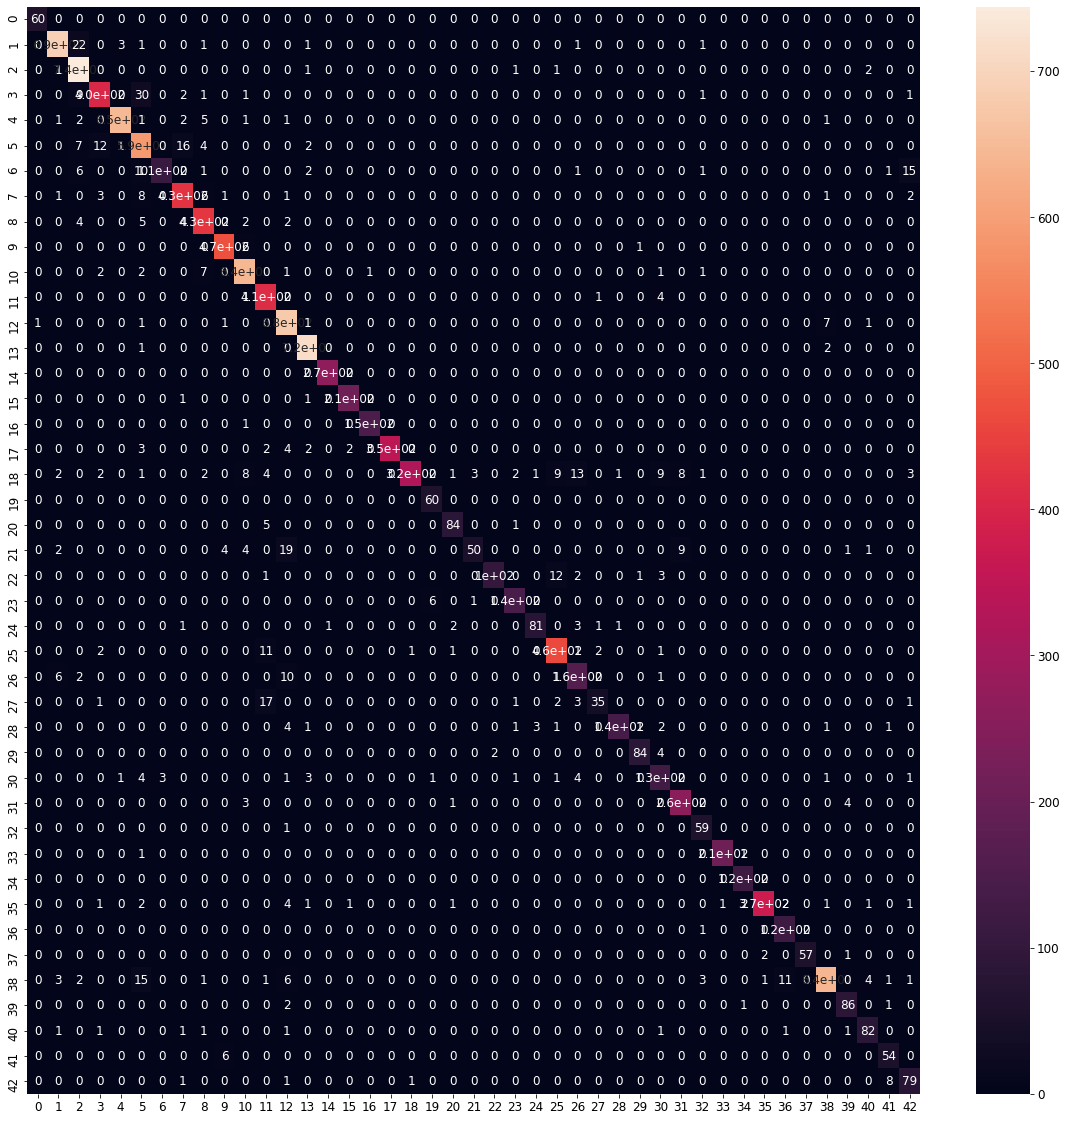

In [58]:
import seaborn as sb
from sklearn.metrics import confusion_matrix

classes = [i for i in range(43)]
cm = confusion_matrix(test_labels,pred)
df = pd.DataFrame(cm, index = classes, columns = classes)
plt.figure(figsize=(20,20))
sb.heatmap(df,annot=True)
plt.rc('font', size=12) 
plt.plot()